# The Dicke Model

The Dicke model is a quantum mechanical model for describing the interaction of electromagnetic radiation with a collection of two-level atoms. It was first introduced by physicist Robert H. Dicke in the 1950s and has since been widely studied in the field of quantum optics. The model predicts the collective behavior of a large ensemble of atoms and how they interact with a common electromagnetic field, resulting in a variety of collective phenomena, such as superradiance and subradiance. The Dicke model has important applications in areas such as quantum information processing and quantum communication.

In [1]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pip install qutip
from qutip import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 48.6 MB/s eta 0:00:00


## Introduction

The Dicke Hamiltonian consists of a cavity mode and $N$
 spin-1/2 coupled to the cavity:

 $$ \displaystyle H_D = \omega_0 \sum_{i=1}^N \sigma_z^{(i)} + \omega a^\dagger a + \sum_{i}^N \frac{\lambda}{\sqrt{N}}(a + a^\dagger)(\sigma_+^{(i)}+\sigma_-^{(i)})$$


 $$ \displaystyle H_D = \omega_0 J_z + \omega a^\dagger a +  \frac{\lambda}{\sqrt{N}}(a + a^\dagger)(J_+ + J_-) $$

 where $J_z$ and $J_{\pm}$ are the collective angular momentum operators for a pseudospin of length $j = N/2$

 $$ \displaystyle J_z = \sum_{i=1}^N \sigma_z^{(i)}$$

 $$ \displaystyle J_\pm = \sum_{i=1}^N \sigma_\pm^{(i)} $$

## Setup problem in QuTiP

In [3]:
w  = 1.0
w0 = 1.0

g = 1.0
gc = sqrt(w * w0)/2 # critical coupling strength

kappa = 0.05 
gamma = 0.15

In [35]:
M = 16
N = 4
n = N+1
#j = N/2
#n= 2*j + 1
#m = 5
print(n)
#print(j)
tensor(destroy(M),qeye(n))

5


Quantum object: dims = [[16, 5], [16, 5]], shape = (80, 80), type = oper, isherm = False
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [17]:
M = 16
N = 4
j = N/2.0
n = 2*j + 1

a  = tensor(destroy(M), qeye(5))
Jp = tensor(qeye(M), jmat(j, '+'))
Jm = tensor(qeye(M), jmat(j, '-'))
Jz = tensor(qeye(M), jmat(j, 'z'))

H0 = w * a.dag() * a + w0 * Jz
H1 = 1.0 / sqrt(N) * (a + a.dag()) * (Jp + Jm)
H = H0 + g * H1



In [18]:
print(H)

Quantum object: dims = [[16, 5], [16, 5]], shape = (80, 80), type = oper, isherm = True
Qobj data =
[[ 2.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 15.  0.  0.]
 [ 0.  0.  0. ...  0. 14.  0.]
 [ 0.  0.  0. ...  0.  0. 13.]]


## Structure of the Hamiltonian

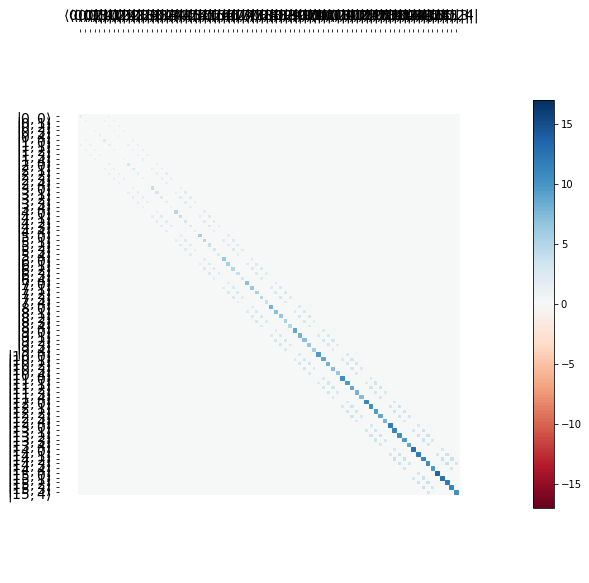

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
hinton(H, ax=ax);

## Find the ground state as a function of cavity-spin interaction strength

In [21]:
g_vec = linspace(0.01, 1.0, 20)

# Ground state and steady state for the Hamiltonian: H = H0 + g * H1
psi_gnd_list = [(H0 + g * H1).groundstate()[1] for g in g_vec]

## Cavity ground state occupation probability

In [22]:
n_gnd_vec = expect(a.dag() * a, psi_gnd_list)  
Jz_gnd_vec = expect(Jz, psi_gnd_list) 

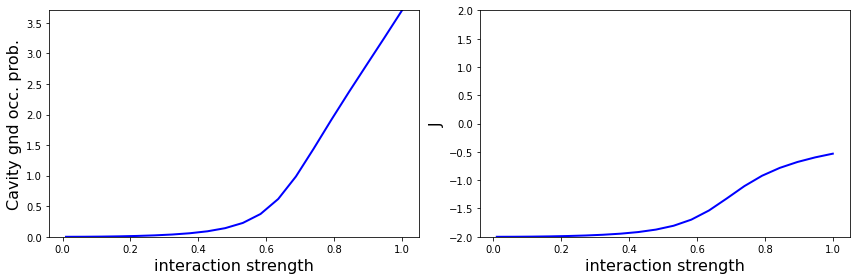

In [23]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,4))

axes[0].plot(g_vec, n_gnd_vec, 'b', linewidth=2, label="cavity occupation")
axes[0].set_ylim(0, max(n_gnd_vec))
axes[0].set_ylabel("Cavity gnd occ. prob.", fontsize=16)
axes[0].set_xlabel("interaction strength", fontsize=16)

axes[1].plot(g_vec, Jz_gnd_vec, 'b', linewidth=2, label="cavity occupation")
axes[1].set_ylim(-j, j)
axes[1].set_ylabel(r"J", fontsize=16)
axes[1].set_xlabel("interaction strength", fontsize=16)

fig.tight_layout()

## Cavity Wigner function and Fock distribution as a function of coupling strength

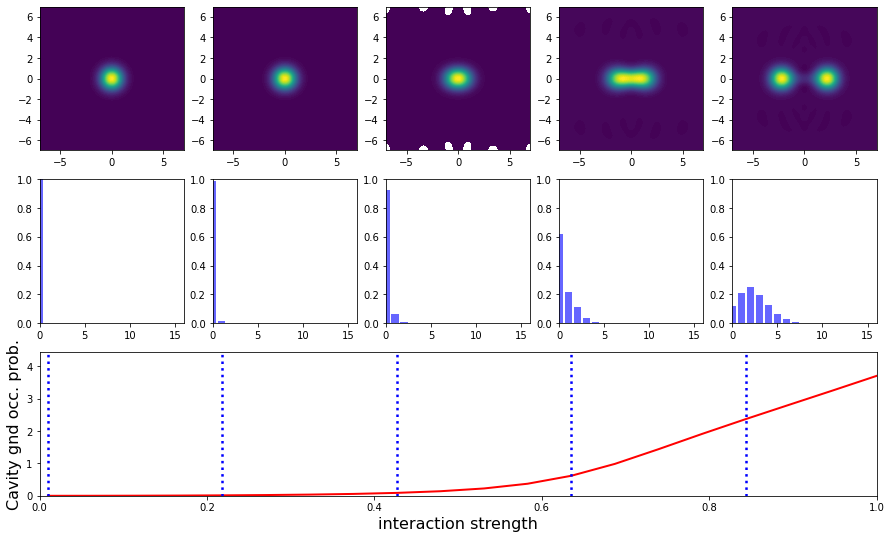

In [25]:
psi_gnd_sublist = psi_gnd_list[::4]

xvec = linspace(-7,7,200)

fig_grid = (3, len(psi_gnd_sublist))
fig = plt.figure(figsize=(3*len(psi_gnd_sublist),9))

for idx, psi_gnd in enumerate(psi_gnd_sublist):

    # trace out the cavity density matrix
    rho_gnd_cavity = ptrace(psi_gnd, 0)
    
    # calculate its wigner function
    W = wigner(rho_gnd_cavity, xvec, xvec)
    
    # plot its wigner function
    ax = plt.subplot2grid(fig_grid, (0, idx))
    ax.contourf(xvec, xvec, W, 100)

    # plot its fock-state distribution
    ax = plt.subplot2grid(fig_grid, (1, idx))
    ax.bar(arange(0, M), real(rho_gnd_cavity.diag()), color="blue", alpha=0.6)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, M)    
    
# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (2, 0), colspan=fig_grid[1])
ax.plot(g_vec, n_gnd_vec, 'r', linewidth=2, label="cavity occupation")
ax.set_xlim(0, max(g_vec))
ax.set_ylim(0, max(n_gnd_vec)*1.2)
ax.set_ylabel("Cavity gnd occ. prob.", fontsize=16)
ax.set_xlabel("interaction strength", fontsize=16)

for g in g_vec[::4]:
    ax.plot([g,g],[0,max(n_gnd_vec)*1.2], 'b:', linewidth=2.5)

## Entropy/Entanglement between spins and cavity

In [26]:
entropy_tot    = zeros(shape(g_vec))
entropy_cavity = zeros(shape(g_vec))
entropy_spin   = zeros(shape(g_vec))

for idx, psi_gnd in enumerate(psi_gnd_list):

    rho_gnd_cavity = ptrace(psi_gnd, 0)
    rho_gnd_spin   = ptrace(psi_gnd, 1)
    
    entropy_tot[idx]    = entropy_vn(psi_gnd, 2)
    entropy_cavity[idx] = entropy_vn(rho_gnd_cavity, 2)
    entropy_spin[idx]   = entropy_vn(rho_gnd_spin, 2)

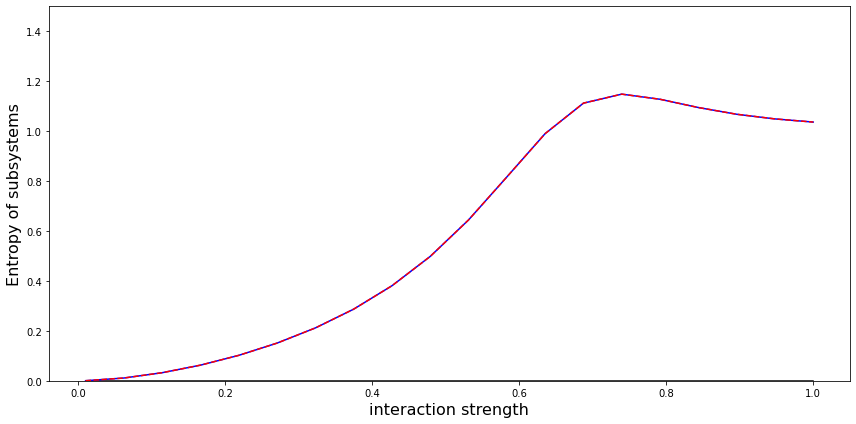

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.plot(g_vec, entropy_tot, 'k', g_vec, entropy_cavity, 'b', g_vec, entropy_spin, 'r--')

axes.set_ylim(0, 1.5)
axes.set_ylabel("Entropy of subsystems", fontsize=16)
axes.set_xlabel("interaction strength", fontsize=16)

fig.tight_layout()

## Entropy as a function interaction strength for increasing N


In [36]:
def calulcate_entropy(M, N, g_vec):
    
    #j = N/2.0
    n = N + 1

    # setup the hamiltonian for the requested hilbert space sizes
    a  = tensor(destroy(M), qeye(n))
    Jp = tensor(qeye(M), jmat(j, '+'))
    Jm = tensor(qeye(M), jmat(j, '-'))
    Jz = tensor(qeye(M), jmat(j, 'z'))

    H0 = w * a.dag() * a + w0 * Jz
    H1 = 1.0 / sqrt(N) * (a + a.dag()) * (Jp + Jm)

    # Ground state and steady state for the Hamiltonian: H = H0 + g * H1
    psi_gnd_list = [(H0 + g * H1).groundstate()[1]  for g in g_vec]
    
    entropy_cavity = zeros(shape(g_vec))
    entropy_spin   = zeros(shape(g_vec))

    for idx, psi_gnd in enumerate(psi_gnd_list):

        rho_gnd_cavity = ptrace(psi_gnd, 0)
        rho_gnd_spin   = ptrace(psi_gnd, 1)
    
        entropy_cavity[idx] = entropy_vn(rho_gnd_cavity, 2)
        entropy_spin[idx]   = entropy_vn(rho_gnd_spin, 2)
        
    return entropy_cavity, entropy_spin

In [ ]:
g_vec = linspace(0.2, 0.8, 60)
N_vec = [4, 8, 12, 16, 24, 32]
MM = 25

fig, axes = plt.subplots(1, 1, figsize=(12,6))

for NN in N_vec:
    
    entropy_cavity, entropy_spin = calulcate_entropy(MM, NN, g_vec)
    
    axes.plot(g_vec, entropy_cavity, 'b', label="N = %d" % NN)
    axes.plot(g_vec, entropy_spin, 'r--')

axes.set_ylim(0, 1.75)
axes.set_ylabel("Entropy of subsystems", fontsize=16)
axes.set_xlabel("interaction strength", fontsize=16)
axes.legend()
     

## Dissipative cavity: steady state instead of the ground state

In [39]:
# average number thermal photons in the bath coupling to the resonator
n_th = 0.25

c_ops = [sqrt(kappa * (n_th + 1)) * a, sqrt(kappa * n_th) * a.dag()]
#c_ops = [sqrt(kappa) * a, sqrt(gamma) * Jm]

## Find the ground state as a function of cavity-spin interaction strength

In [41]:
g_vec = linspace(0.01, 1.0, 20)

# Ground state for the Hamiltonian: H = H0 + g * H1
rho_ss_list = [steadystate(H0 + g * H1, c_ops) for g in g_vec]

## Cavity ground state occupation probability


In [42]:
# calculate the expectation value of the number of photons in the cavity
n_ss_vec = expect(a.dag() * a, rho_ss_list)

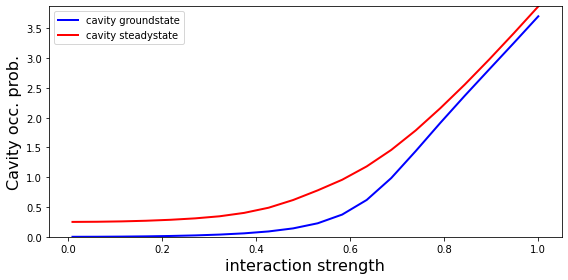

In [43]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(g_vec, n_gnd_vec,'b', linewidth=2, label="cavity groundstate")
axes.plot(g_vec, n_ss_vec, 'r', linewidth=2, label="cavity steadystate")
axes.set_ylim(0, max(n_ss_vec))
axes.set_ylabel("Cavity occ. prob.", fontsize=16)
axes.set_xlabel("interaction strength", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()

## Cavity Wigner function and Fock distribution as a function of coupling strength

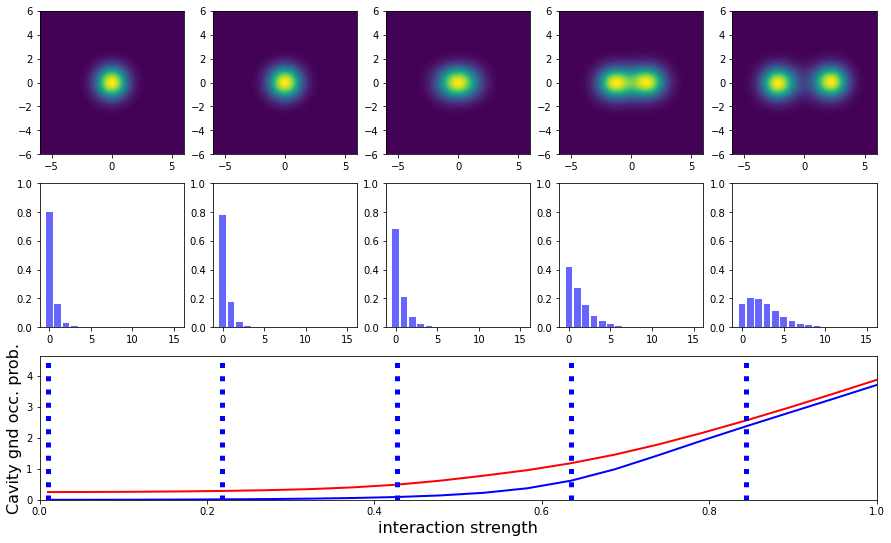

In [44]:
rho_ss_sublist = rho_ss_list[::4]

xvec = linspace(-6,6,200)

fig_grid = (3, len(rho_ss_sublist))
fig = plt.figure(figsize=(3*len(rho_ss_sublist),9))

for idx, rho_ss in enumerate(rho_ss_sublist):

    # trace out the cavity density matrix
    rho_ss_cavity = ptrace(rho_ss, 0)
    
    # calculate its wigner function
    W = wigner(rho_ss_cavity, xvec, xvec)
    
    # plot its wigner function
    ax = plt.subplot2grid(fig_grid, (0, idx))
    ax.contourf(xvec, xvec, W, 100)

    # plot its fock-state distribution
    ax = plt.subplot2grid(fig_grid, (1, idx))
    ax.bar(arange(0, M), real(rho_ss_cavity.diag()), color="blue", alpha=0.6)
    ax.set_ylim(0, 1)
    
# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (2, 0), colspan=fig_grid[1])
ax.plot(g_vec, n_gnd_vec,'b', linewidth=2, label="cavity groundstate")
ax.plot(g_vec, n_ss_vec, 'r', linewidth=2, label="cavity steadystate")
ax.set_xlim(0, max(g_vec))
ax.set_ylim(0, max(n_ss_vec)*1.2)
ax.set_ylabel("Cavity gnd occ. prob.", fontsize=16)
ax.set_xlabel("interaction strength", fontsize=16)

for g in g_vec[::4]:
    ax.plot([g,g],[0,max(n_ss_vec)*1.2], 'b:', linewidth=5)

## Entropy

In [45]:
entropy_tot    = zeros(shape(g_vec))
entropy_cavity = zeros(shape(g_vec))
entropy_spin   = zeros(shape(g_vec))

for idx, rho_ss in enumerate(rho_ss_list):

    rho_gnd_cavity = ptrace(rho_ss, 0)
    rho_gnd_spin   = ptrace(rho_ss, 1)
    
    entropy_tot[idx]    = entropy_vn(rho_ss, 2)
    entropy_cavity[idx] = entropy_vn(rho_gnd_cavity, 2)
    entropy_spin[idx]   = entropy_vn(rho_gnd_spin, 2)

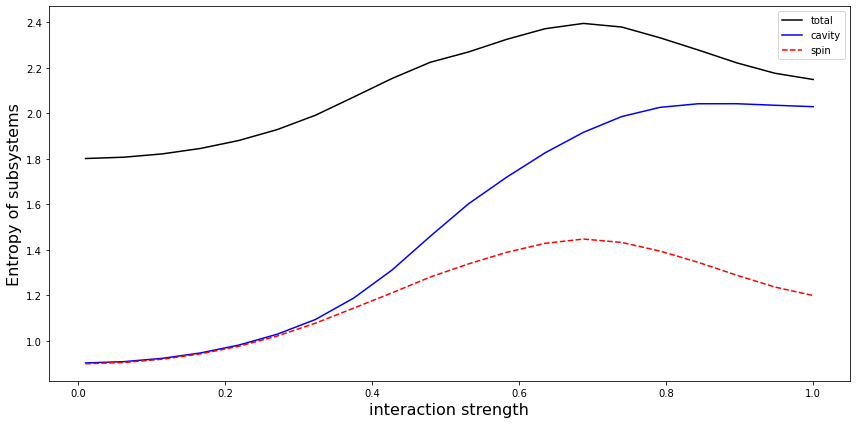

In [46]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))

axes.plot(g_vec, entropy_tot, 'k', label="total")
axes.plot(g_vec, entropy_cavity, 'b', label="cavity")
axes.plot(g_vec, entropy_spin, 'r--', label="spin")

axes.set_ylabel("Entropy of subsystems", fontsize=16)
axes.set_xlabel("interaction strength", fontsize=16)
axes.legend(loc=0)
fig.tight_layout()

## Software Versions

In [47]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.7.1
Numpy,1.21.6
SciPy,1.7.3
matplotlib,3.2.2
Cython,0.29.33
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,7.9.0
Python,"3.8.10 (default, Nov 14 2022, 12:59:47) [GCC 9.4.0]"
OS,posix [linux]
